# **ES 114 Probability Lab Assignment - 8 : Correlation**

Name- Shardul Rakesh Junagade

Roll No- 23110297

In this assignment, I have conducted a detailed analysis of the correlation between the numerical attributes of the Iris dataset using Python. The primary tasks of this assignment are as follows:

1. **Estimation of Mean and Variance**: Calculated the mean and variance for each of the four numerical attributes (`sepal_length`, `sepal_width`, `petal_length`, `petal_width`) in the Iris dataset.

2. **Correlation Coefficients**:  
   a) Computed the correlation coefficients between all pairs of attributes.  
   b) Arranged these pairs in descending order of their correlation coefficients for the complete dataset.  
   c) Repeated the correlation analysis separately for the three species (`setosa`, `versicolor`, `virginica`) and reported the findings.

3. **Exploratory Data Analysis (EDA)**:  
   Conducted scatter plot visualizations to examine relationships between pairs of features for the complete dataset as well as for each species individually.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Loading Iris Dataset

The Iris dataset, a well-known dataset in machine learning and statistics, contains measurements of four features (`sepal_length`, `sepal_width`, `petal_length`, `petal_width`) for 150 samples of three species: `setosa`, `versicolor`, and `virginica`. This dataset was used for all computations and visualizations in this assignment.

By analyzing these metrics and correlations, the relationships between the features were studied comprehensively, both across the entire dataset and within individual species.


In [2]:
data = sns.load_dataset("iris")
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
species_list=data["species"].unique()
print("The unique species in the given dataset are:")
print(species_list)

The unique species in the given dataset are:
['setosa' 'versicolor' 'virginica']


## Helper Functions

#### Mean:
For a dataset $X = \{x_1, x_2, \dots, x_n\}$, the mean is given by:  
$$
\bar{x} = \frac{\sum_{i=1}^{n} x_i}{n}
$$


In [4]:
# Function to calculate the mean of the data
def calc_mean(data):
  sum=0
  for i in data:
    sum+=i
  mean=sum/len(data)
  return mean

#### Variance:

Sample variance (denoted by s²) is a statistical measure that tells you how spread out a set of data (sample) is from its average (sample mean). It essentially quantifies the variability within the sample.

The variance measures the spread of data from the mean:  
$$
s^2 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n - 1}
$$


In [5]:
# Function to calculate the variance of the data
def calc_variance(data):
  mean=calc_mean(data)
  sum=0
  for i in data:
    sum+=((i-mean)**2)
  variance=sum/(len(data)-1)
  return variance

#### Covariance:

Sample covariance $(s_{xy})$ is a statistical measure that tells you how two variables within a sample dataset tend to vary together. It captures the direction and strength of the linear relationship between them.

Covariance can be calculated as follows:
$$
s_{xy} = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{n - 1}
$$

In [6]:
# Function to calculate the covariance of 2 variables
def calc_covariance(data_1,data_2):
  mean_1=calc_mean(data_1)
  mean_2=calc_mean(data_2)
  sum=0
  for i in range(len(data_1)):
    sum+=(data_1[i]-mean_1)*(data_2[i]-mean_2)
  covariance=sum/(len(data_1)-1)
  return covariance

#### Correlation Coefficient:

The correlation coefficient ($r$) is a statistical measure that tells you the strength and direction of the linear relationship between two variables in a data set. It provides a single value between -1 and 1.


The correlation coefficient is calculated as:  
$$
r = \frac{s_{xy}}{\sqrt{s_x^2} \cdot \sqrt{s_y^2}}
$$  
Here, $s_x^2$ and $s_y^2$ are the variances of $x$ and $y$, respectively, and $s_{xy}$ is their covariance.


In [7]:
# Function to calculate the correlation coefficient of 2 variables
def correlation_coefficient(data_1,data_2):
  variance_1=calc_variance(data_1)
  variance_2=calc_variance(data_2)
  covariance=calc_covariance(data_1,data_2)
  corr=covariance/((variance_1**(1/2))*(variance_2**(1/2)))
  return corr

# I. Estimating the mean and the variance of the four attributes.

In [8]:
attributes = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

print(f"{'Group':<12}{'Attribute':<15}{'Mean':<10}{'Variance':<10}")
print("-" * 50)

print("Entire Dataset")
for attribute in attributes:
    values = data[attribute].values
    mean = calc_mean(values)
    variance = calc_variance(values)
    print(f"{'All':<12}{attribute:<15}{mean:<10.4f}{variance:<10.4f}")
print("-" * 50)

species = data["species"].unique()
for specie in species:
    print(f"Species: {specie}")
    for attribute in attributes:
        values = data[data["species"] == specie][attribute].values
        mean = calc_mean(values)
        variance = calc_variance(values)
        print(f"{specie:<12}{attribute:<15}{mean:<10.4f}{variance:<10.4f}")
    print("-" * 50)


Group       Attribute      Mean      Variance  
--------------------------------------------------
Entire Dataset
All         sepal_length   5.8433    0.6857    
All         sepal_width    3.0573    0.1900    
All         petal_length   3.7580    3.1163    
All         petal_width    1.1993    0.5810    
--------------------------------------------------
Species: setosa
setosa      sepal_length   5.0060    0.1242    
setosa      sepal_width    3.4280    0.1437    
setosa      petal_length   1.4620    0.0302    
setosa      petal_width    0.2460    0.0111    
--------------------------------------------------
Species: versicolor
versicolor  sepal_length   5.9360    0.2664    
versicolor  sepal_width    2.7700    0.0985    
versicolor  petal_length   4.2600    0.2208    
versicolor  petal_width    1.3260    0.0391    
--------------------------------------------------
Species: virginica
virginica   sepal_length   6.5880    0.4043    
virginica   sepal_width    2.9740    0.1040    
virgin

# II. Arranging the pairs of attributes in the descending order of their correlation coefficients.

In [9]:
def sort_correlations(data, print_sorted=True):
	"""
	Calculate and arrange the correlation coefficients of attributes in descending order.
	"""
	correlation_coefficients = []
	columns = data.select_dtypes(include=['float', 'int']).columns  # Ensure only numeric columns are selected

	# Compute correlation coefficients for each pair
	for i in range(len(columns)):
		for j in range(i + 1, len(columns)):
			col_1 = columns[i]
			col_2 = columns[j]
			data_1 = data[col_1].values
			data_2 = data[col_2].values
			corr = correlation_coefficient(data_1, data_2)
			correlation_coefficients.append(((col_1, col_2), corr))

	# Sort the correlation coefficients in descending order
	sorted_correlations = sorted(correlation_coefficients, key=lambda x: x[1], reverse=True)

	if print_sorted:
		max_pair_length = max(len(f"{pair[0]} and {pair[1]}") for pair, _ in sorted_correlations)
		header = f"{'Attribute Pair':<{max_pair_length}}  {'Correlation Coefficient':>20}"
		underline = "-" * len(header)
		print(header)
		print(underline)
		for pair, corr in sorted_correlations:
			pair_str = f"{pair[0]} and {pair[1]}"
			print(f"{pair_str:<{max_pair_length}}  {corr:>20.4f}")

	return sorted_correlations


For entire dataset

In [10]:
print("Entire Dataset\n")
entire_dataset_sorted_correlations = sort_correlations(data, print_sorted=True)

Entire Dataset

Attribute Pair                 Correlation Coefficient
------------------------------------------------------
petal_length and petal_width                 0.9629
sepal_length and petal_length                0.8718
sepal_length and petal_width                 0.8179
sepal_length and sepal_width                -0.1176
sepal_width and petal_width                 -0.3661
sepal_width and petal_length                -0.4284


For species "setosa"

In [11]:
setosa_data=data[data["species"]=="setosa"]
print("Species 1: setosa\n")
setosa_sorted_correlations = sort_correlations(setosa_data, print_sorted=True)

Species 1: setosa

Attribute Pair                 Correlation Coefficient
------------------------------------------------------
sepal_length and sepal_width                 0.7425
petal_length and petal_width                 0.3316
sepal_length and petal_width                 0.2781
sepal_length and petal_length                0.2672
sepal_width and petal_width                  0.2328
sepal_width and petal_length                 0.1777


For species "versicolor"

In [12]:
versicolor_data=data[data["species"]=="versicolor"]
print("Species 2: versicolor\n")
versicolor_sorted_correlations = sort_correlations(versicolor_data, print_sorted=True)

Species 2: versicolor

Attribute Pair                 Correlation Coefficient
------------------------------------------------------
petal_length and petal_width                 0.7867
sepal_length and petal_length                0.7540
sepal_width and petal_width                  0.6640
sepal_width and petal_length                 0.5605
sepal_length and petal_width                 0.5465
sepal_length and sepal_width                 0.5259


For species "virginica"

In [13]:
virginica_data=data[data["species"]=="virginica"]
print("Species 3: virginica\n")
virginica_sorted_correlations = sort_correlations(virginica_data, print_sorted=True)

Species 3: virginica

Attribute Pair                 Correlation Coefficient
------------------------------------------------------
sepal_length and petal_length                0.8642
sepal_width and petal_width                  0.5377
sepal_length and sepal_width                 0.4572
sepal_width and petal_length                 0.4010
petal_length and petal_width                 0.3221
sepal_length and petal_width                 0.2811


# III. Exploratory Data Analysis (EDA): Visualizing Attribute Pairs in Decreasing Order of Correlation Coefficients

In [14]:
def eda_analysis(data, title):
    """
    Perform exploratory data analysis by plotting scatter plots for feature pairs 
    in descending order of correlation coefficients.
    """
    sorted_correlations = sort_correlations(data, print_sorted=False)

    num_plots = len(sorted_correlations)
    num_rows = (num_plots + 2) // 3
    custom_colors = ['r', 'b', 'g', 'purple', 'hotpink', 'black']

    plt.figure(figsize=(18, 11))
    plt.suptitle(title, fontsize=20)
    for idx, ((feature_1, feature_2), corr) in enumerate(sorted_correlations):
        plt.subplot(num_rows, 3, idx + 1)
        plt.scatter(data[feature_1], data[feature_2], alpha=0.4, label=f"r = {corr:.2f}", color=custom_colors[idx])
        plt.title(f"{feature_1} vs {feature_2}", fontsize=12)
        plt.xlabel(feature_1, fontsize=10)
        plt.ylabel(feature_2, fontsize=10)
        plt.legend(fontsize=9)
    plt.tight_layout(rect=[0, 0, 1, 0.98])  # Add space for the main title
    plt.show()


## EDA over entire dataset

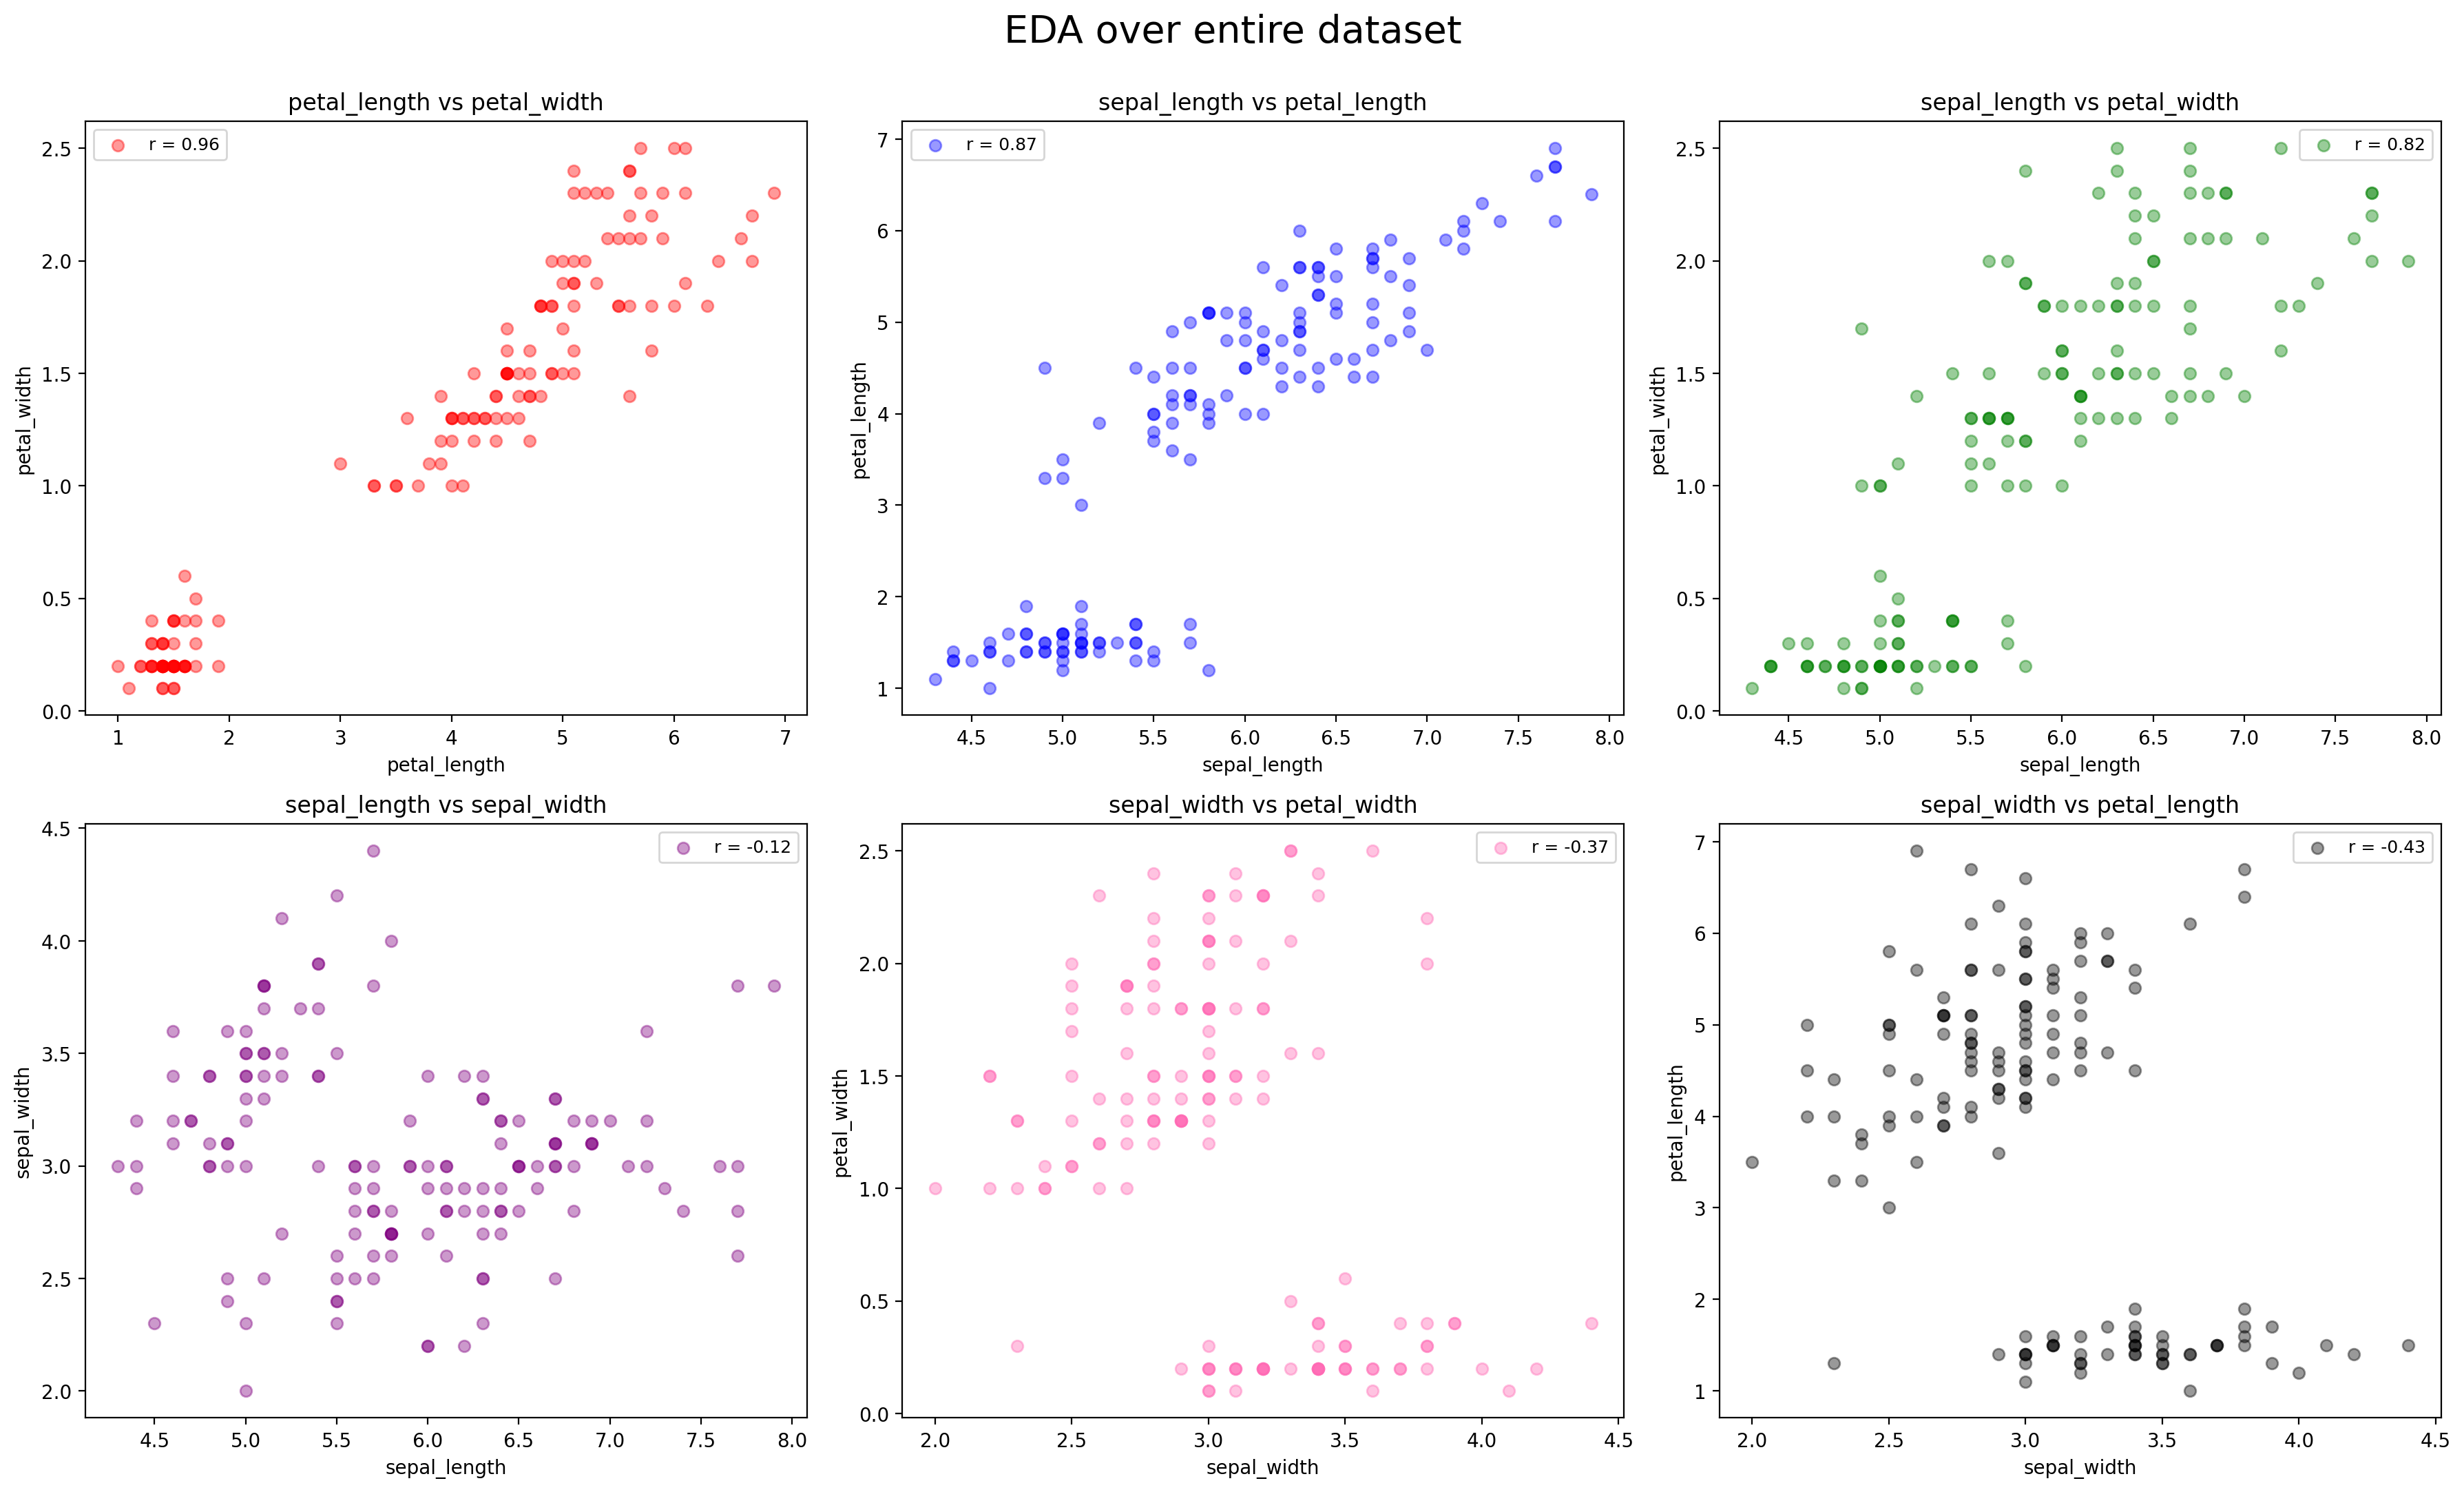

In [15]:
eda_analysis(data, "EDA over entire dataset")

## a) EDA over species - "setosa"

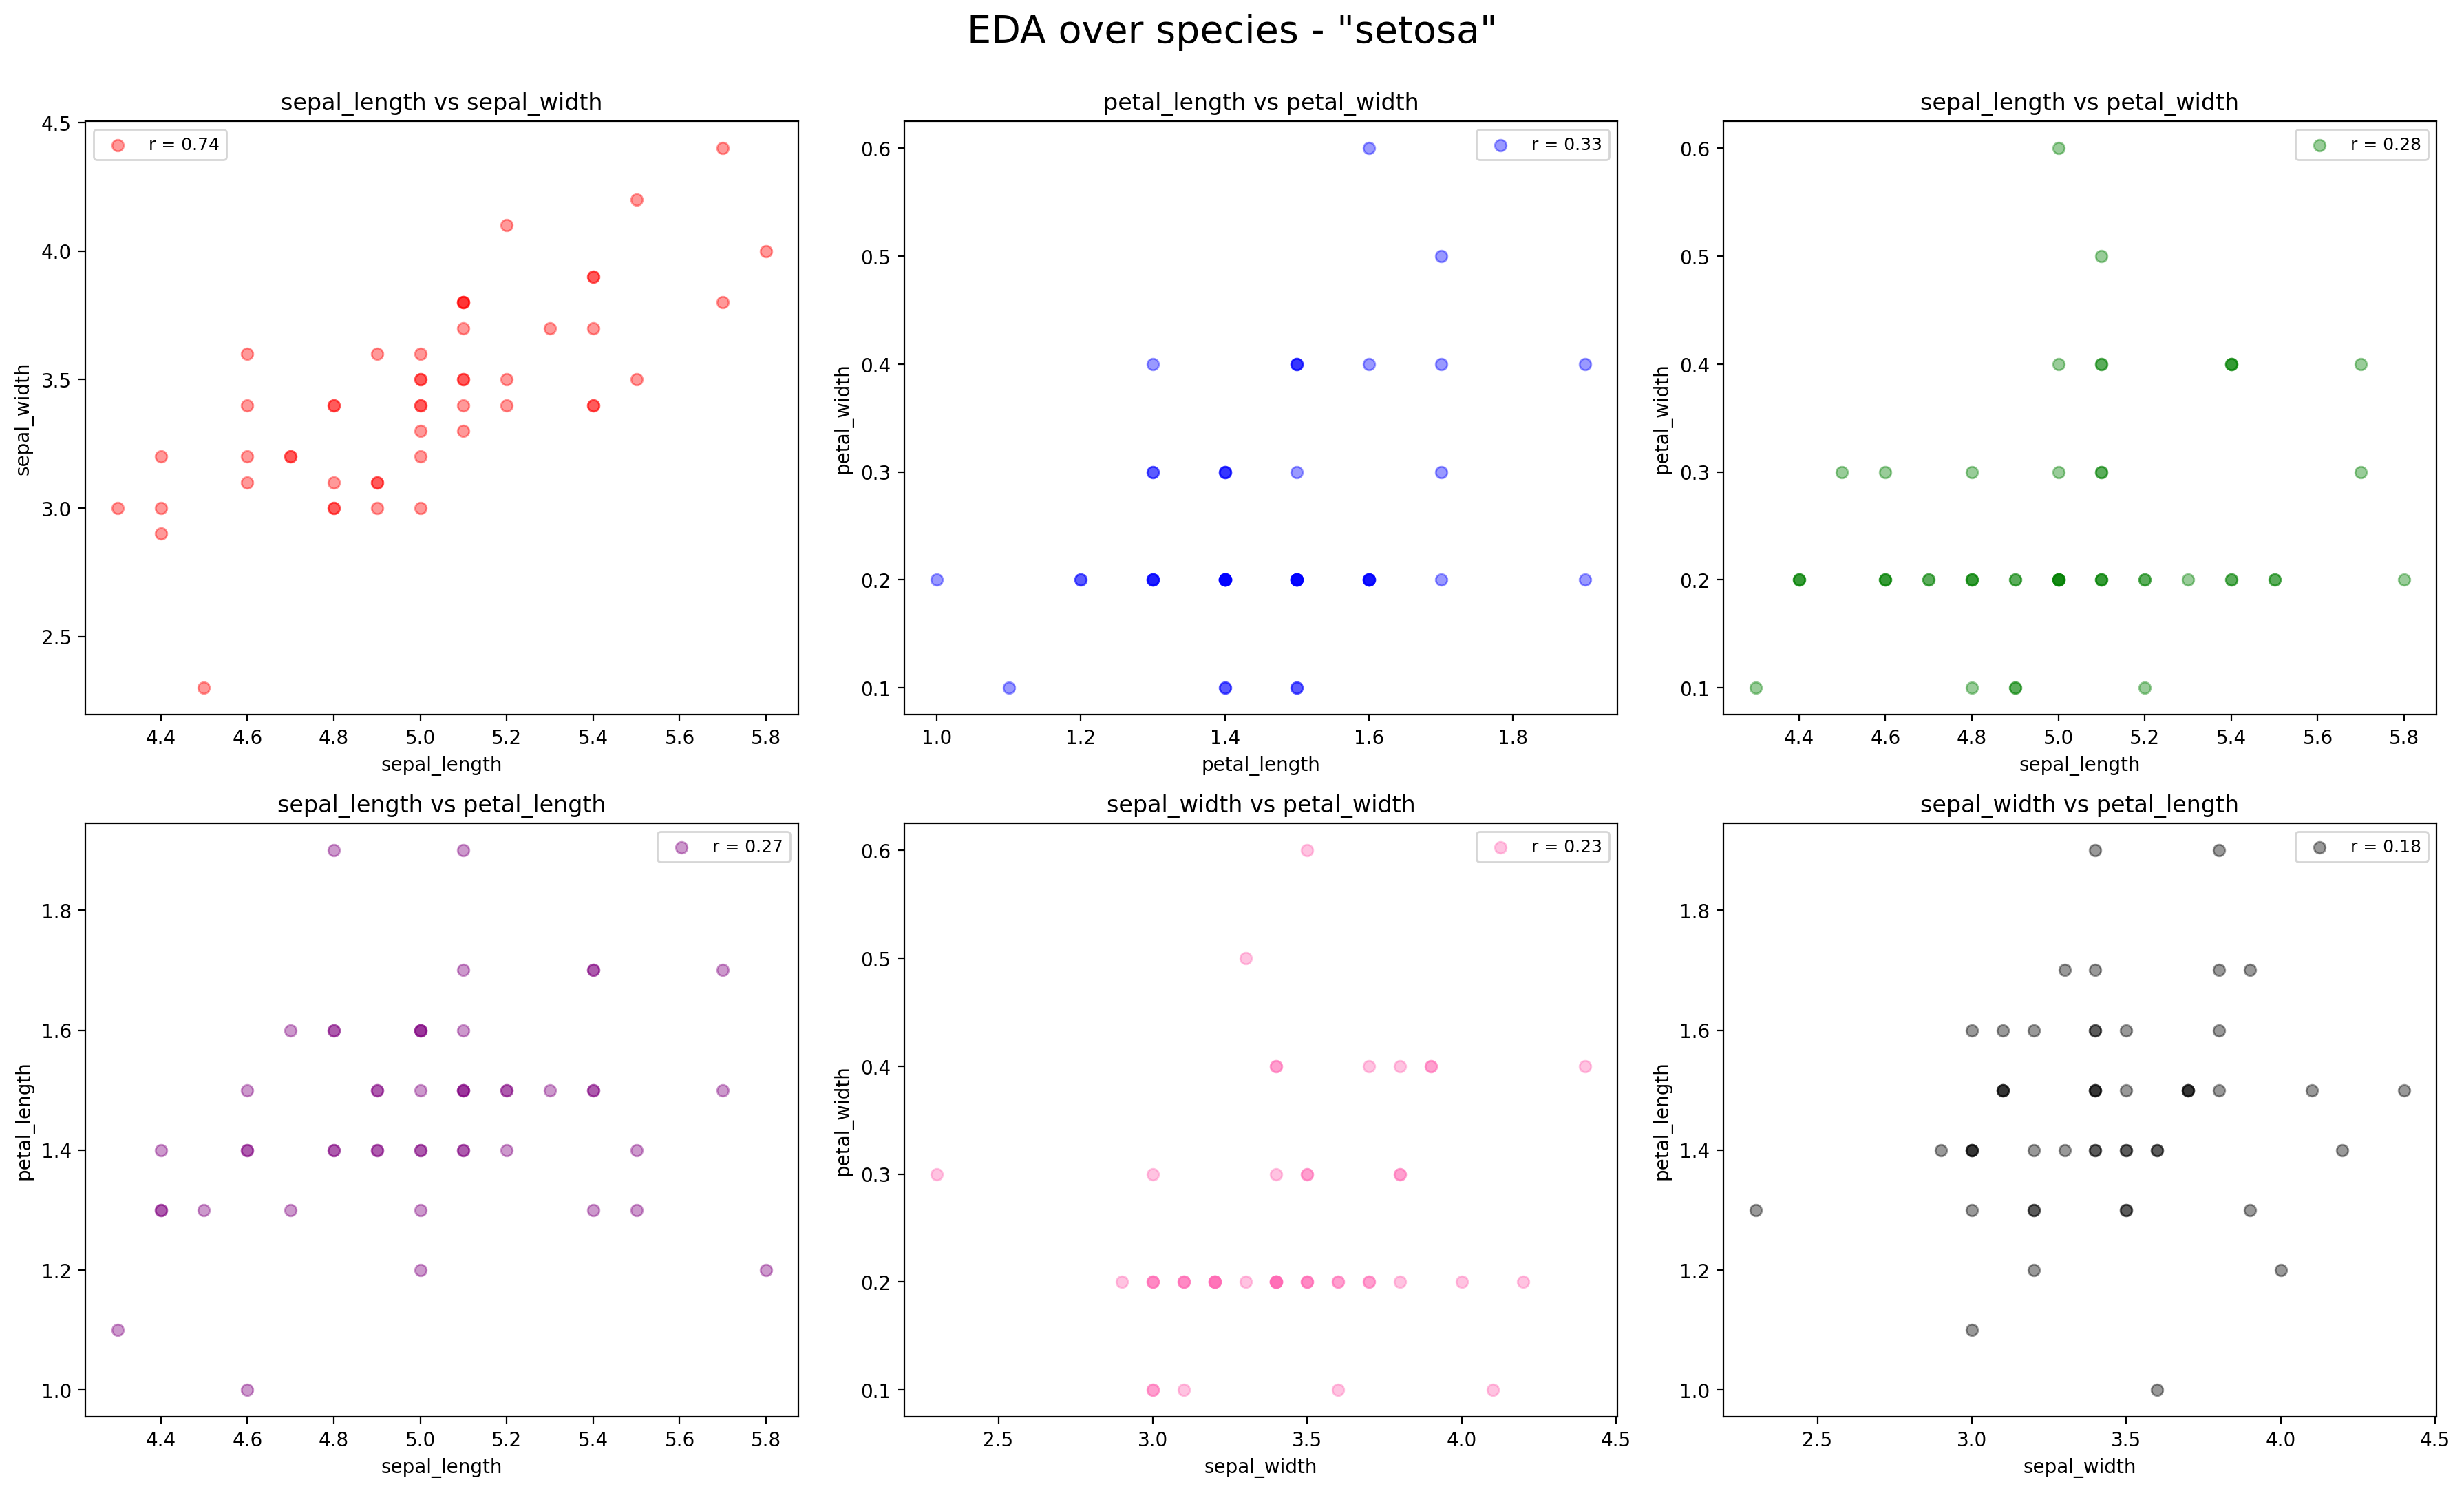

In [16]:
eda_analysis(setosa_data, "EDA over species - \"setosa\"")

## b) EDA over species - "versicolor"

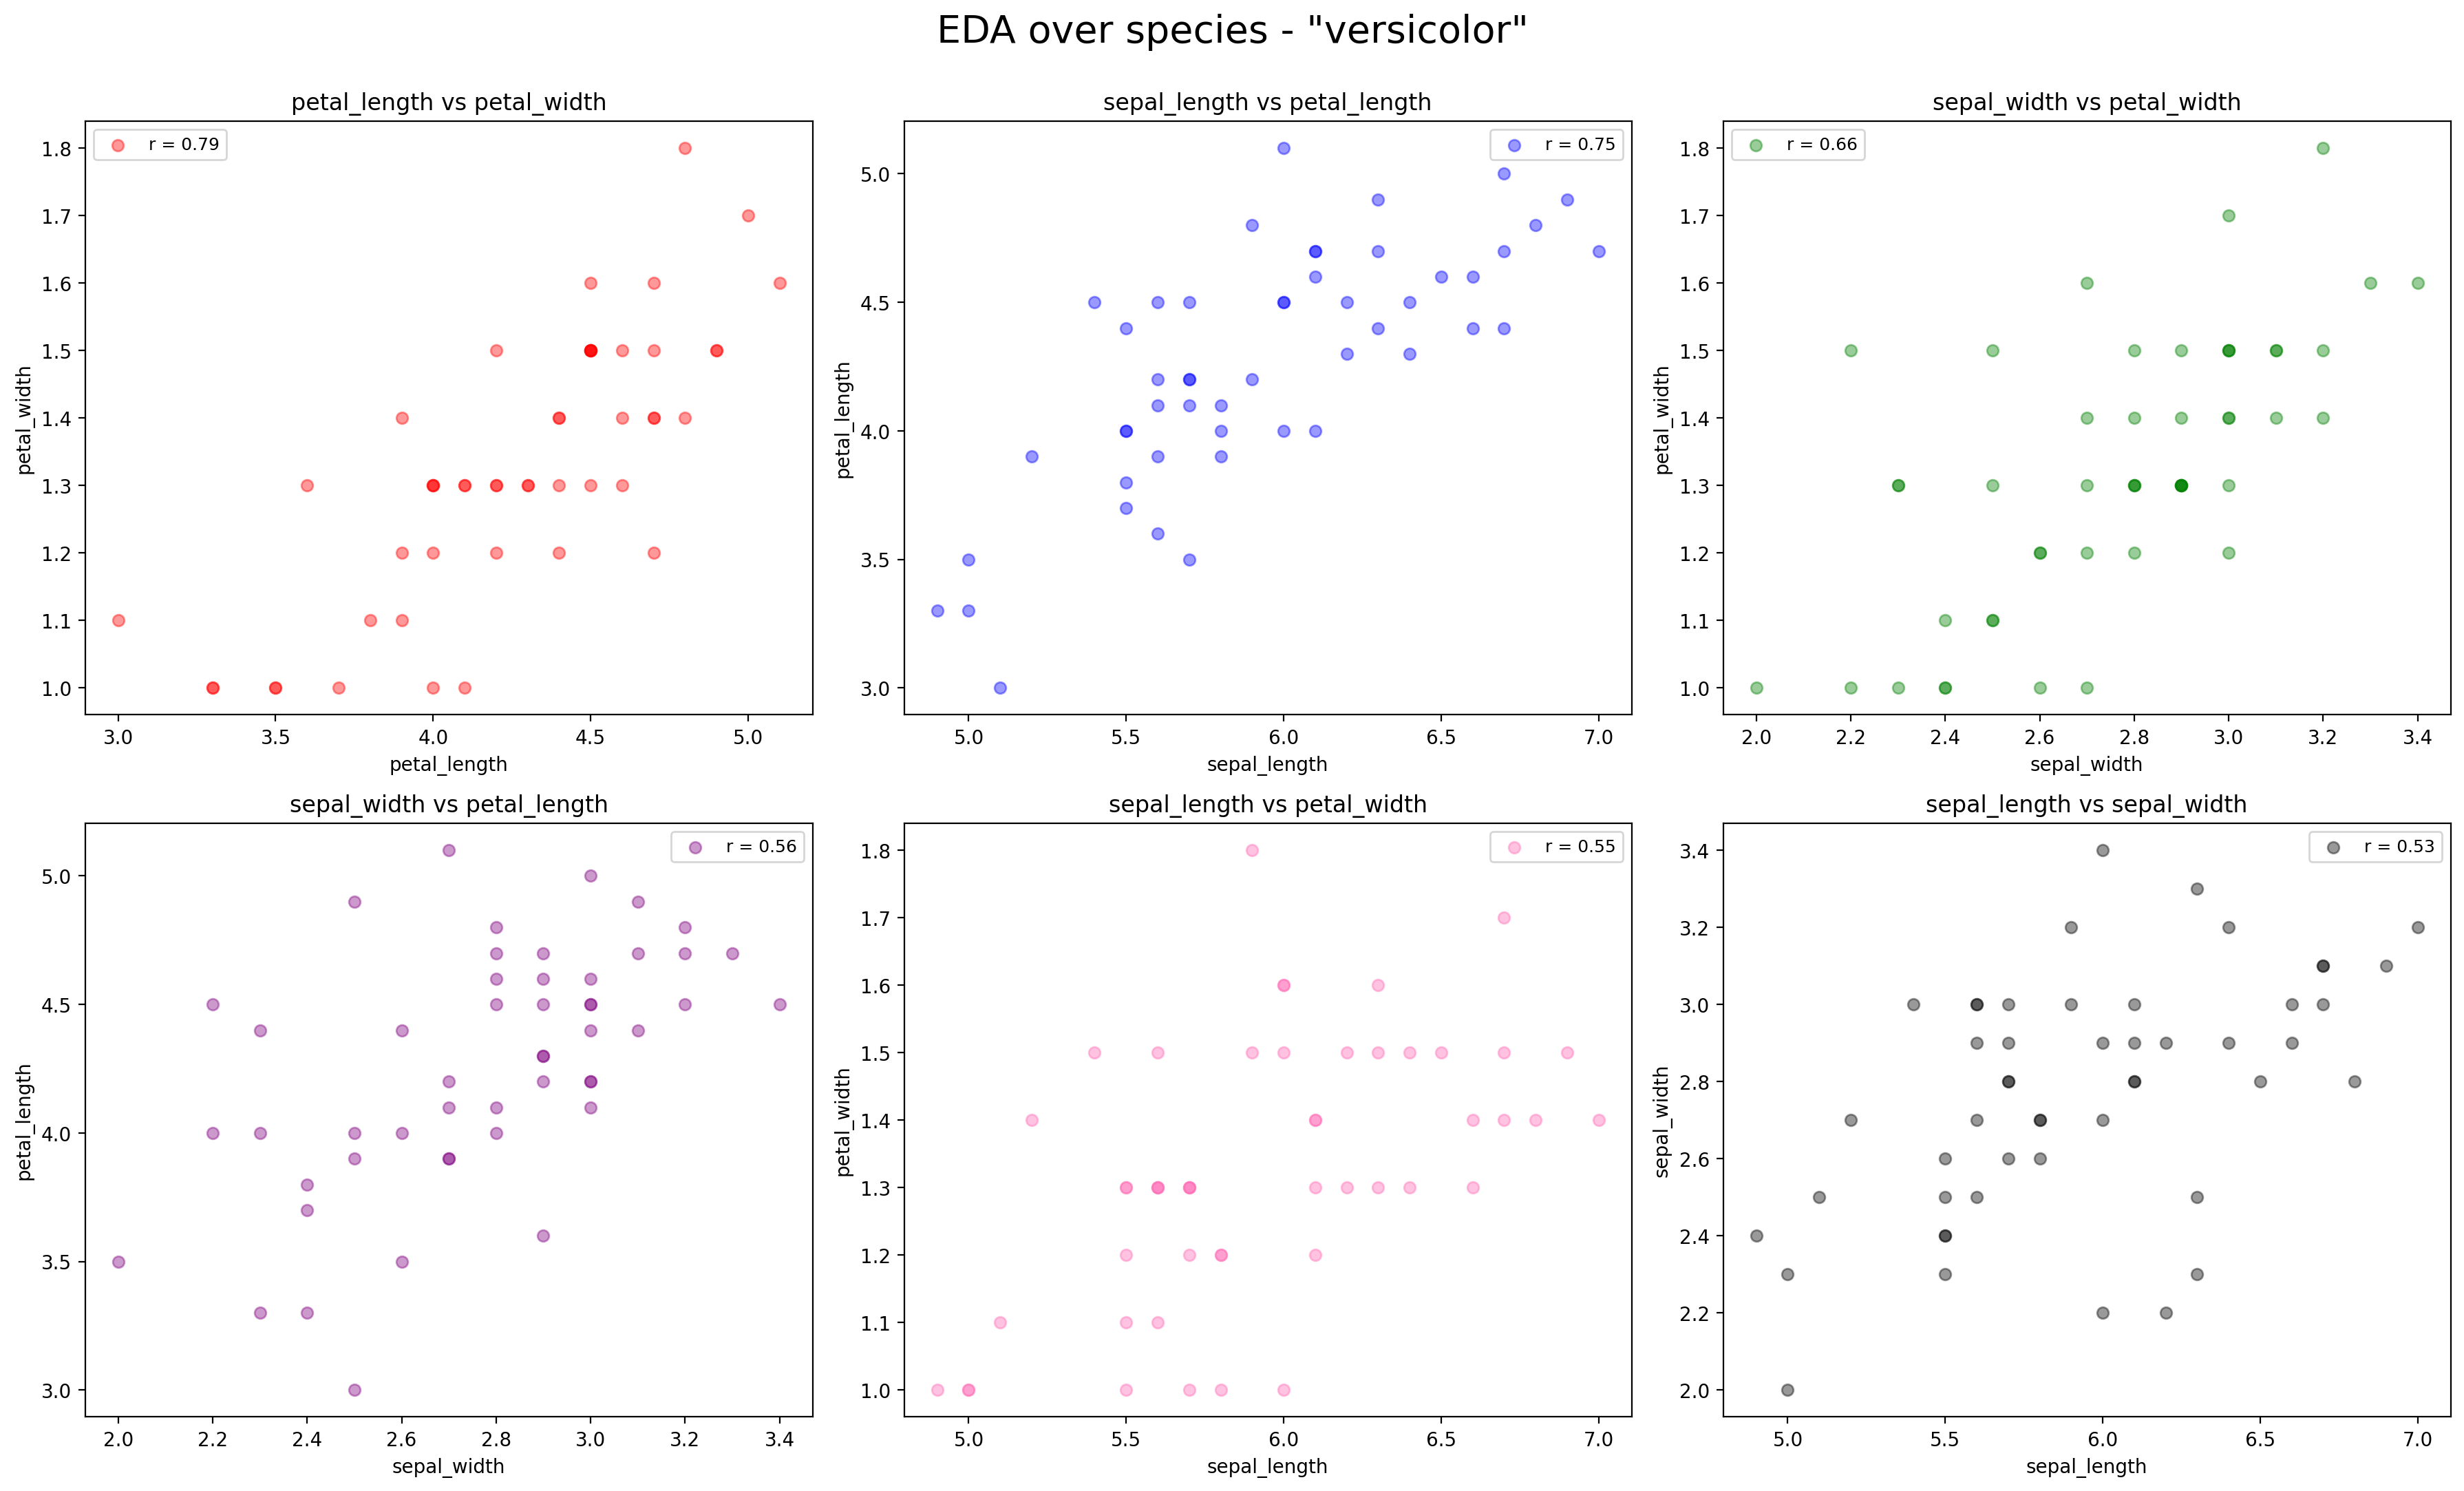

In [17]:
eda_analysis(versicolor_data, "EDA over species - \"versicolor\"")

## c) EDA over species - "virginica"

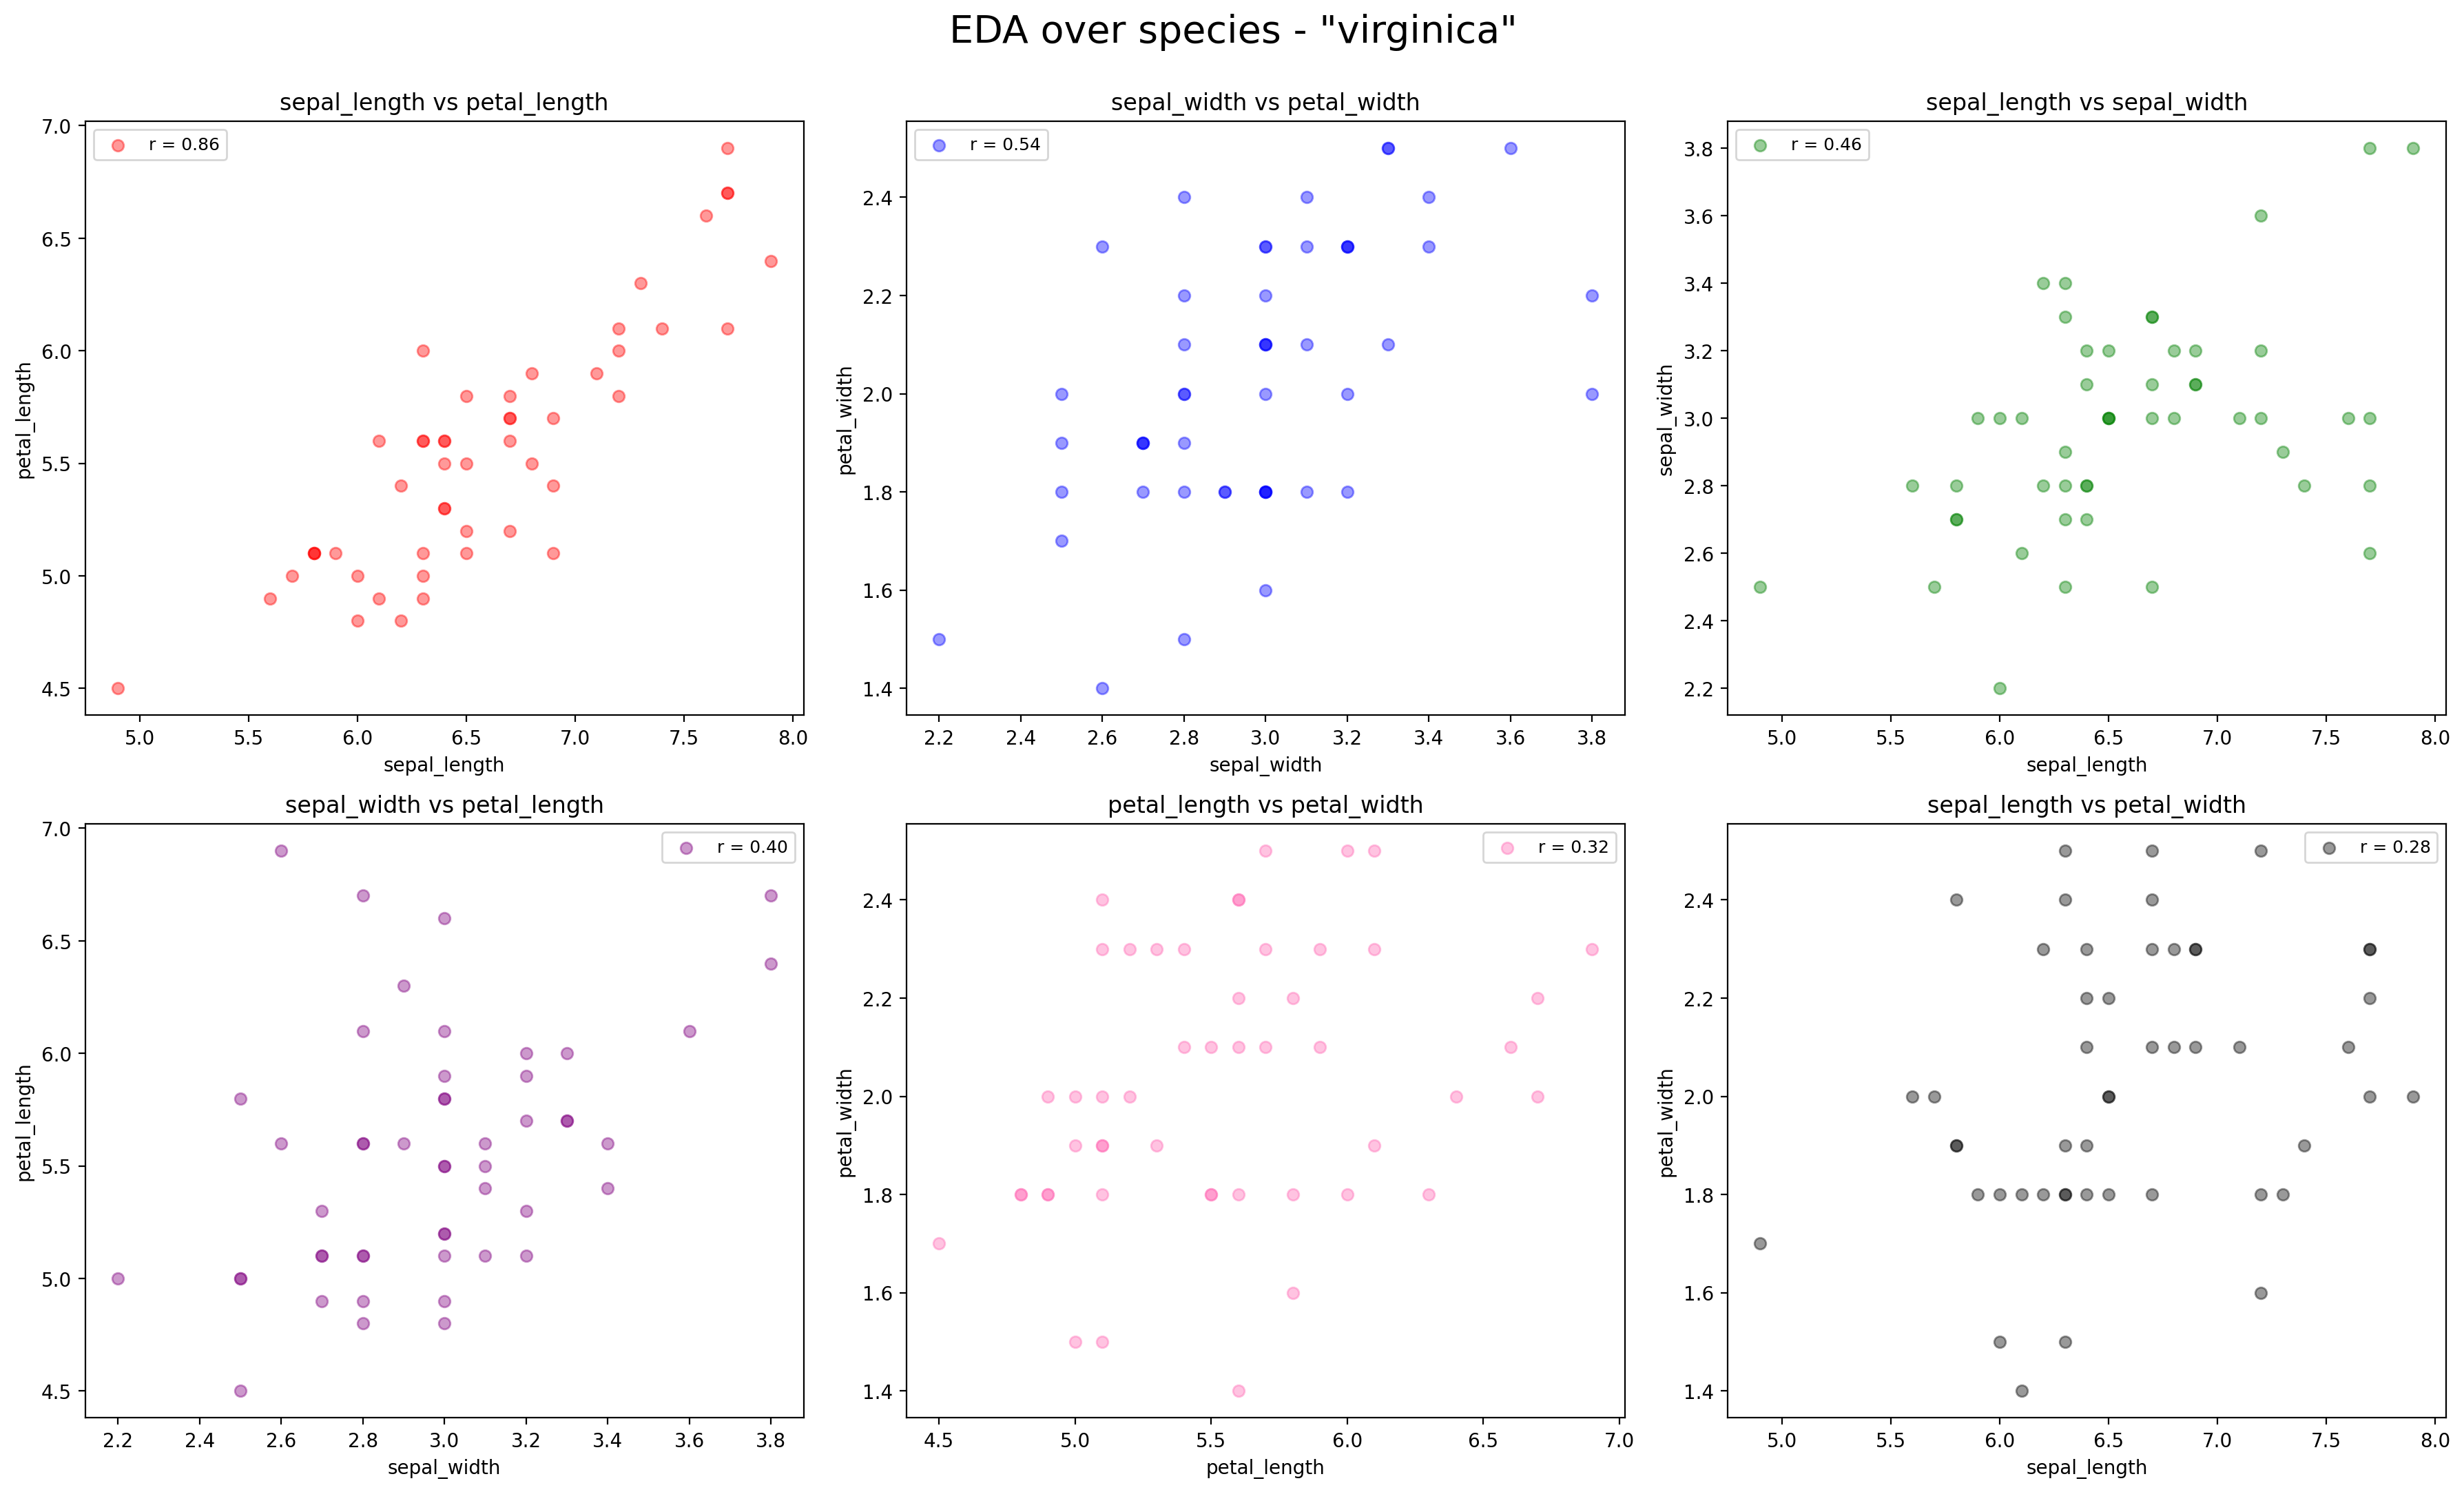

In [18]:
eda_analysis(virginica_data, "EDA over species - \"virginica\"")

# References

1. “seaborn-data/iris.csv at master · mwaskom/seaborn-data,” GitHub. https://github.com/mwaskom/seaborn-data/blob/master/iris.csv (accessed Apr. 01, 2024).

2. “seaborn.load_dataset — seaborn 0.11.1 documentation,” seaborn.pydata.org. https://seaborn.pydata.org/generated/seaborn.load_dataset.html

3. Lab Discussion Notes - “Google Colaboratory,” colab.research.google.com. https://colab.research.google.com/drive/1VpyCjEtvToboiqmj73hgRIqVXftnh1Wm#scrollTo=Wd9Q3n2JVhnV (accessed Apr. 01, 2024).